<a href="https://colab.research.google.com/github/dnguyend/MiscCollection/blob/main/colab/DerivingTheMetricInProposition54.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook provides the symbolic calculations in the proof for Proposition 5.4 in our paper **Curvatures of Stiefel manifolds with deformation metrics**.

The page can be run in colab environment - you will need a google account to run. Otherwise we can follow the presentation without running. If cells are hidden, just click on them they will expand.

The related page  https://github.com/dnguyend/MiscCollection/blob/main/colab/EinsteinRicciSON.ipynb provides numerical examples. This page contains only the symbolic derivations.

Let $p = 2dk$, the set $\{1,\cdots p\}$ is divided to $q=2d$ interval $I_1\cdots I_q$ each of length $k$. We assume the metric $t_{ij}$ is clustered to $q^2=4d^2$ blocks $t_{[q_1q_2]} = t_{I_{q_1}I_{q_2}}$
each of size $k\times k$ as follow for $d=2, q=4$
$$\begin{bmatrix} t_{[11]}=1 & t_{[12]} = t_1 & t_{[13]}=t_2 & t_{[14]} = t_1\\
 *  & t_{[22]} = 1 & t_{[23]}=t_1 & t_{[24]} = t_2\\
 *  & * & t_{[33]}= 1 & t_{[34]} = t_1\\
 *  & * & * & t_{[44]} = 1
 \end{bmatrix}
$$
The Ricci curvature will also have the form $\sum_{ij} r_{ij}a_{ij}^2$, where $r_{ij}$ are also of block form $r_{[q_1q_2]}$, with $r_{[q_1,q_1]} = r_0$
$r_{[q_1,q_2]} = r_b$ with $b\in\{1, 2\}, |q_1 - q_2|\equiv b\mod 2$. Set $x= t_2/t_1$

The formulas for $r_0, r_1, r_2$ could be expressed in $x$ and $t_1$ and are given below. Hit the play buttons on the cell below to run.


In [1]:
import sympy as sp
from sympy import symbols
d, k, t1, x = symbols('d k t1 x')

In [2]:
q = 2*d
p = q*k
t2 = x*t1
r0 = (k - 2)/2 + d*k/2/t1/t1 + (d-1)*k/2/t2/t2
r1 = p - 2 - (k-1)/t1 + k*(-t2/t1)*(q-2)/2
r2 = p - 2 - (k-1)/t2 + k*(t2*t2/t1/t1-2)*d/2 + (d-2)*(-1)*k/2
display("r0=", r0)
display("r1=", r1)
display("r2=", r2)


'r0='

d*k/(2*t1**2) + k/2 + k*(d - 1)/(2*t1**2*x**2) - 1

'r1='

2*d*k - k*x*(2*d - 2)/2 - 2 - (k - 1)/t1

'r2='

d*k*(x**2 - 2)/2 + 2*d*k + k*(2 - d)/2 - 2 - (k - 1)/(t1*x)

## Set the Einstein condition

In [3]:
e1 = sp.expand(2*x*x*t1*(r0*t1 - r1))
e2 = sp.expand(2*t1*x*(r0*t2-r2))
print("e1=")
display(e1)
print("e2=")
display(e1)

e1=


2*d*k*t1*x**3 - 4*d*k*t1*x**2 + d*k*x**2 + d*k + k*t1**2*x**2 - 2*k*t1*x**3 + 2*k*x**2 - k - 2*t1**2*x**2 + 4*t1*x**2 - 2*x**2

e2=


2*d*k*t1*x**3 - 4*d*k*t1*x**2 + d*k*x**2 + d*k + k*t1**2*x**2 - 2*k*t1*x**3 + 2*k*x**2 - k - 2*t1**2*x**2 + 4*t1*x**2 - 2*x**2

print the coefficients powers of $x$ and $t1$ format

In [4]:
print("e1")
for jj in range(3, -1, -1):
  for kk in range(3, -1, -1):
    print('x^%d t1^%d' % (jj, kk), e1.coeff(x, jj).coeff(t1, kk))

print("e2")
for jj in range(3, -1, -1):
  for kk in range(3, -1, -1):
    print('t1^%d x^%d' % (jj, kk), e2.coeff(t1, jj).coeff(x, kk))    

e1
x^3 t1^3 0
x^3 t1^2 0
x^3 t1^1 2*d*k - 2*k
x^3 t1^0 0
x^2 t1^3 0
x^2 t1^2 k - 2
x^2 t1^1 -4*d*k + 4
x^2 t1^0 d*k + 2*k - 2
x^1 t1^3 0
x^1 t1^2 0
x^1 t1^1 0
x^1 t1^0 0
x^0 t1^3 0
x^0 t1^2 0
x^0 t1^1 0
x^0 t1^0 d*k - k
e2
t1^3 x^3 0
t1^3 x^2 0
t1^3 x^1 0
t1^3 x^0 0
t1^2 x^3 0
t1^2 x^2 k - 2
t1^2 x^1 0
t1^2 x^0 0
t1^1 x^3 -d*k
t1^1 x^2 0
t1^1 x^1 -d*k - 2*k + 4
t1^1 x^0 0
t1^0 x^3 0
t1^0 x^2 d*k
t1^0 x^1 0
t1^0 x^0 d*k + k - 2


## $e_3 = e_1-e_2$ could be factored, having a root $x=1$, and other roots

In [5]:
e3 = sp.factor(e1-e2)
e3

(x - 1)*(3*d*k*t1*x**2 - d*k*t1*x - 2*k*t1*x**2 - 2*k*t1*x + 2*k*x + 2*k + 4*t1*x - 2*x - 2)

Now solve for the case $x=1$. Substitute $x=1$ to $e_1$ then factor/solve

In [6]:
e1x1 = sp.factor(e1.subs(x, 1))
t1solv1 = sp.solve(e1x1, t1)
print("first solution")
t1solv1

first solution


[1, (2*d*k + k - 2)/(k - 2)]

These are the solutions for $t_1$ in a) and b). We have $t_2=t_1$ in these two cases. Next, we assume $x\neq 1$ and solve for the remaining factor of $e_3$

In [7]:
e4 = e3.args[1]
display("e4=", e4)
display("e4, coeff t1^1",e4.coeff(t1, 1))
display("e4, coeff t1^0", e4.coeff(t1, 0))
t1ax = sp.factor(sp.simplify(-e4.coeff(t1, 0)/e4.coeff(t1, 1)))
display("t1ax=", t1ax)

'e4='

3*d*k*t1*x**2 - d*k*t1*x - 2*k*t1*x**2 - 2*k*t1*x + 2*k*x + 2*k + 4*t1*x - 2*x - 2

'e4, coeff t1^1'

3*d*k*x**2 - d*k*x - 2*k*x**2 - 2*k*x + 4*x

'e4, coeff t1^0'

2*k*x + 2*k - 2*x - 2

't1ax='

-2*(k - 1)*(x + 1)/(x*(3*d*k*x - d*k - 2*k*x - 2*k + 4))

Substitute $t1ax$, the solution for $t_1$ from $e_4=0$, then substitute in $e_1$, multiply by the denominator to get a polynomial form

In [8]:
e5 = sp.factor(sp.expand(e1.subs(t1, t1ax)*e4.coeff(t1, 1)*e4.coeff(t1, 1)))
display("e5=", e5)

'e5='

x**2*(3*d*k*x - d*k - 2*x + 2)*(3*d**2*k**2*x**3 - d**2*k**2*x**2 + 3*d**2*k**2*x - d**2*k**2 - 2*d*k**2*x**3 - 2*d*k**2*x**2 + d*k**2*x - 3*d*k**2 + 4*d*k*x**2 - 6*d*k*x + 6*d*k - 2*k*x + 2*k + 4*x - 4)

In [9]:
print(e5)

x**2*(3*d*k*x - d*k - 2*x + 2)*(3*d**2*k**2*x**3 - d**2*k**2*x**2 + 3*d**2*k**2*x - d**2*k**2 - 2*d*k**2*x**3 - 2*d*k**2*x**2 + d*k**2*x - 3*d*k**2 + 4*d*k*x**2 - 6*d*k*x + 6*d*k - 2*k*x + 2*k + 4*x - 4)


Since $x\neq 0$, there are only two cases corresponding to two factors of $e5$. Solve for the first one. 

In [10]:
x1c = sp.solve(e5.args[1], x)
x1c

[(d*k - 2)/(3*d*k - 2)]

Substitute to get corresponding values of $t1, t2$ in c)

In [11]:
t1c = sp.simplify(t1ax.subs(x, x1c[0]))
t2c = sp.simplify(t1c*x1c[0])
print("t1c")
display(t1c)
print("t2c")
display(t2c)

t1c


(3*d*k - 2)/(d*k - 2)

t2c


1

Now, the remaining equation, the remaining factor of $e5$ gives us the equation $F(x)$ in d) of the proposition

In [12]:
Fx = e5.args[2]
display(Fx)
print("coefficients")
for jj in range(3, -1, -1):
  for kk in range(2, -1, -1):
    print('x^%d k^%d' % (jj, kk))
    display(Fx.coeff(x, jj).coeff(k, kk))

3*d**2*k**2*x**3 - d**2*k**2*x**2 + 3*d**2*k**2*x - d**2*k**2 - 2*d*k**2*x**3 - 2*d*k**2*x**2 + d*k**2*x - 3*d*k**2 + 4*d*k*x**2 - 6*d*k*x + 6*d*k - 2*k*x + 2*k + 4*x - 4

coefficients
x^3 k^2


3*d**2 - 2*d

x^3 k^1


0

x^3 k^0


0

x^2 k^2


-d**2 - 2*d

x^2 k^1


4*d

x^2 k^0


0

x^1 k^2


3*d**2 + d

x^1 k^1


-6*d - 2

x^1 k^0


4

x^0 k^2


-d**2 - 3*d

x^0 k^1


6*d + 2

x^0 k^0


-4

Now apply the intermediate value theorem to show it has a root between $0$ and $x_{asymp}$.At $x=0$ the following shows $F(0)$ is negative

In [13]:
Fx0 = sp.expand(sp.simplify(Fx.subs(x, 0)))
display(Fx0)


-d**2*k**2 - 3*d*k**2 + 6*d*k + 2*k - 4

Note $-3dk^2+6dk < 0$,  $-d^2k^2  +2k < 0$ if $k >2, d> 1$, and the case $d=1$ is below which is clearly negative.

In [14]:
display(Fx0.subs(d, 1))


-4*k**2 + 8*k - 4

Now $t_1$ is the solution of $e4 = 0$ in terms of the remaining variables,
let $x_{asymp}$ be the value of $x$ making the denominator of the expression of $t_1$ vanishes

In [15]:
xasymp = sp.solve(e4.coeff(t1, 1), x)[1]
xasymp

(d*k + 2*k - 4)/(k*(3*d - 2))

Substitute and we see $F(xasym) > 0$ below Thus $F(x)=0$ has a root between $0$ and $x_{asymp}  >0$. From the expression of $t_1$, $t_1> 0$ at that root, and thus $t_1, t_2> 0$ coressponding to a metric.

In [16]:
Fxasymp = sp.simplify(Fx.subs(x, xasymp))
display(sp.factor(sp.simplify(Fxasymp)))
T2 = sp.symbols('T2')


8*(k - 2)*(k - 1)*(d*k - 1)/(k*(3*d - 2))

## We have proved the main part of the theorem. Now we show some additional properties. 


### First, $t1 \geq t2 \geq 1$.
We show $xasym < 1$ then $x \leq 1$. Thus $t1 > t2$. This is clear from the below

In [17]:
display(sp.simplify(xasymp-1))


2*(-d*k + 2*k - 2)/(k*(3*d - 2))

We show $t_2 \geq 1$ to prove $t_2 > t_1 > 1$. We derive the equation for $t_2$

In [18]:
T2 = sp.symbols('T2')
xt2 = sp.solve(t1ax*x-T2, x)[0]
display(xt2)

eqT2 = sp.factor(sp.expand(sp.simplify(Fx.subs(x, xt2)*(3*d*k*T2 - 2*k*T2 +2*k-2)*(3*d*k*T2 - 2*k*T2 +2*k-2)*(3*d*k*T2 - 2*k*T2 +2*k-2)))).args[3]
print("equation for t2")
display(eqT2)
print("leading coefficient of equation for t2")
display(sp.factor(eqT2.coeff(T2, 3)))
print("value of eqT2 at t2=1")
display(sp.factor(eqT2.subs(T2, 1)))


(T2*d*k + 2*T2*k - 4*T2 - 2*k + 2)/(3*T2*d*k - 2*T2*k + 2*k - 2)

equation for t2


-9*T2**3*d**2*k**3 + 18*T2**3*d**2*k**2 + 12*T2**3*d*k**3 - 24*T2**3*d*k**2 - 4*T2**3*k**3 + 8*T2**3*k**2 + 10*T2**2*d**3*k**3 + T2**2*d**2*k**3 - 26*T2**2*d**2*k**2 - 16*T2**2*d*k**3 + 44*T2**2*d*k**2 - 8*T2**2*d*k + 12*T2**2*k**3 - 32*T2**2*k**2 + 16*T2**2*k + 8*T2*d**2*k**3 - 8*T2*d**2*k**2 - 4*T2*d*k**3 - 4*T2*d*k**2 + 8*T2*d*k - 12*T2*k**3 + 40*T2*k**2 - 36*T2*k + 8*T2 + 8*d*k**3 - 16*d*k**2 + 8*d*k + 4*k**3 - 16*k**2 + 20*k - 8

leading coefficient of equation for t2


-k**2*(3*d - 2)**2*(k - 2)

value of eqT2 at t2=1


2*d*k*(5*d**2*k**2 - 8*d*k + 4)

Thus, $t2$ satisfies equation $eqT2=0$, with $eqT2(1) > 0$ with negative leading coefficient. Thus $T2 > 1$ if we can prove $T2$ has only one root. This follows from the proof that $F(x)$ has only one root which comes below

# We show the equation $F(x) = 0$ has only one real root when $d > 2$ by computing the discriminant as below

In [19]:
 Fxc3 = Fx.coeff(x, 3)
 Fxc2 = Fx.coeff(x, 2)
 Fxc1 = Fx.coeff(x, 1)
 Fxc0 = Fx.coeff(x, 0)
 disc = 18*Fxc3*Fxc2*Fxc1*Fxc0- 4*Fxc2**3*Fxc0 + Fxc2**2*Fxc1**2 - 4*Fxc3*Fxc1**3 - 27*Fxc3**2*Fxc0**2
 discf = sp.factor(sp.expand(disc))
 display(discf)
 

-4*d*k**2*(100*d**7*k**6 + 120*d**6*k**6 - 720*d**6*k**5 - 91*d**5*k**6 - 356*d**5*k**5 + 1972*d**5*k**4 - 419*d**4*k**6 + 2214*d**4*k**5 - 2372*d**4*k**4 - 1528*d**4*k**3 + 318*d**3*k**6 - 742*d**3*k**5 - 1488*d**3*k**4 + 3464*d**3*k**3 + 128*d**3*k**2 - 468*d**2*k**5 + 1780*d**2*k**4 - 1320*d**2*k**3 - 720*d**2*k**2 - 32*d**2*k + 152*d*k**4 - 616*d*k**3 + 672*d*k**2 - 160*d*k + 128*d + 16*k**3 - 96*k**2 + 192*k - 128)

In [20]:
# print(discf.args)
discf3 = discf.args[3]
discf3

100*d**7*k**6 + 120*d**6*k**6 - 720*d**6*k**5 - 91*d**5*k**6 - 356*d**5*k**5 + 1972*d**5*k**4 - 419*d**4*k**6 + 2214*d**4*k**5 - 2372*d**4*k**4 - 1528*d**4*k**3 + 318*d**3*k**6 - 742*d**3*k**5 - 1488*d**3*k**4 + 3464*d**3*k**3 + 128*d**3*k**2 - 468*d**2*k**5 + 1780*d**2*k**4 - 1320*d**2*k**3 - 720*d**2*k**2 - 32*d**2*k + 152*d*k**4 - 616*d*k**3 + 672*d*k**2 - 160*d*k + 128*d + 16*k**3 - 96*k**2 + 192*k - 128

Thee highest coefficient is $d^3(100d^4 + 120d^3 - 91d^2 - 419d + 318)k^6$

In [21]:
hdterm = sp.factor(discf3.coeff(k, 6))
display(hdterm)
discf3.coeff(k, 6).subs(d, 1)

d**3*(100*d**4 + 120*d**3 - 91*d**2 - 419*d + 318)

28

The coefficient $d^3(100d^4 + 120d^3 - 91d^2 - 419d + 318)$, as a function of $d$, is increasing after $d=1$, valued at $1$=28. Thus $discf3$ is positive when $k$ is sufficiently large

In [22]:
import numpy as np
hdterm_arr = np.zeros(8)
for i in range(8):
  hdterm_arr[i] = sp.expand(hdterm).coeff(d, 7-i)
  
hdterm_poly = np.poly1d(hdterm_arr)
print("derivative has root smaller than 1")
print(np.polyder(hdterm_poly).r)
print(hdterm_poly(1))

derivative has root smaller than 1
[-1.25496339+0.97689469j -1.25496339-0.97689469j  0.83950233+0.j
  0.64185301+0.j          0.        +0.j          0.        +0.j        ]
28.0


We also show $d^6/hdterm$ is decreasing after $d=2$. The numerator of the derivative is
$6d^5(hdterm) - (hdterm)'d6$ and we show the real roots are left of $1$. As mentioned, for $d=1$ the metrics b), c), d) are indentical as demonstrated below, so we will consider $d\geq 2$.

      12      10       9       8
-100 x  - 91 x  - 838 x + 954 x
Derivative of the ratio has roots less than 1 and the function is decreasing after 1
[-2.20380901+0.j          0.62900565+2.04482318j  0.62900565-2.04482318j
  0.94579771+0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j        ]


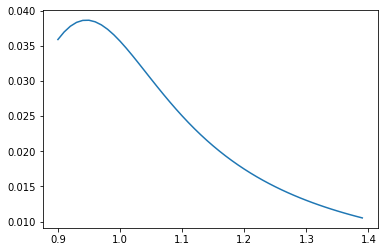

In [23]:
d6 = np.poly1d(np.array([1] + 6*[0]))
numer = np.polyder(d6)*hdterm_poly - np.polyder(hdterm_poly)*d6
print(numer)
print("Derivative of the ratio has roots less than 1 and the function is decreasing after 1")
print(numer.r)
import matplotlib.pyplot as plt
xrr = .9+ np.arange(50)*.01
yrr = d6(xrr)/hdterm_poly(xrr)
plt.plot(xrr, yrr)

The following are negative coefficients of the third factor discf3

In [24]:
discf3
dcoefs = {}
for ii in range(7, -1, -1):
  for jj in range(7, -1, -1):
    if discf3.coeff(d, ii).coeff(k, jj) < 0 and jj != 6:
      dcoefs[(ii, jj)] = discf3.coeff(d, ii).coeff(k, jj)
display(dcoefs)
print(len(dcoefs))

{(0, 0): -128,
 (0, 2): -96,
 (1, 1): -160,
 (1, 3): -616,
 (2, 1): -32,
 (2, 2): -720,
 (2, 3): -1320,
 (2, 5): -468,
 (3, 4): -1488,
 (3, 5): -742,
 (4, 3): -1528,
 (4, 4): -2372,
 (5, 5): -356,
 (6, 5): -720}

14


These are all the negative terms, there are $dclen=14$ of them. Compare $1/dclen$ times the highest term $hdterm$ corresponding to $k^6$ with each of them. After $d\geq 2$ (in fact $d \geq 1$) the function $(dclen) d^6/hdterm$ is decreasing, thus $dclen d^i/hdterm$ are decreasing for $0\leq i\leq 6$. We try to solve for $k$ such that 
$$\frac{hdterm}{dclen} k^6 > -dcoefs[ii, jj] d^{ii} k^{jj}
$$
for all $d$. and all terms with $ dcoefs[ii, jj] $ negative. Thus, for $k$ satisfying
$$k > (\frac{-dclen *dcoefs[ii, jj] d^{ii}}{hdterm})^{1/(6-jj)}_{|d=2}$$
the condition is satisfied. We need to verify case by case when $k < (\frac{-dclen *dcoefs[ii, jj] d^{ii}}{hdterm})^{1/(6-jj)}_{|d=2}$

In [25]:
kvals = []
dclen = len(dcoefs)
for ii, jj in dcoefs:
  # print(ii, jj)
  kvals.append(((-dclen*dcoefs[(ii, jj)]*d**ii/hdterm).subs(d, 2))**(1/(6-jj)))
kvals

[48.1145584725537,
 11.8949880668258,
 6.29505241949584,
 2.94443829241872,
 6.19809069212411,
 3.52556297236007,
 1.95465393794749,
 1.76657732736968,
 1.31685855816703,
 0.668643767426008,
 1.08757257457526,
 0.803124366684776,
 0.562676551166452,
 0.715037799300346]

We need to compute the factor $discf3$ up to $k=49$ showing it is positive, then the discriminant is negative. This is done by showing for fixed $k$ in $\{3,\cdots, 49\}$ the polynomial $discf3$ in $d$ have only real roots less than 1

In [26]:
for i in range(3, 50):
  fd = discf3.subs(k, i)
  nfd = np.zeros(8)
  for jj in range(8):
    nfd[jj] = fd.coeff(d, 7-jj)
    roots = np.poly1d(nfd).r    
  if i < 5:
    display(i, fd)
  print(i, roots[np.where(np.abs(roots.imag)< 1e-3)])

3

72900*d**7 - 87480*d**6 + 6885*d**5 - 837*d**4 + 25668*d**3 - 11760*d**2 + 1376*d + 16

3 [-0.01063822+0.j]


4

409600*d**7 - 245760*d**6 - 232448*d**5 - 154112*d**4 + 385536*d**3 - 119680*d**2 + 9728*d + 128

4 [-0.01147715+0.j]
5 [-0.01076758+0.j]
6 [-0.00982606+0.j]
7 [-0.00893393+0.j]
8 [-0.0081481+0.j]
9 [-0.00746912+0.j]
10 [-0.00688386+0.j]
11 [-0.00637752+0.j]
12 [-0.00593684+0.j]
13 [-0.00555076+0.j]
14 [-0.00521026+0.j]
15 [-0.00490805+0.j]
16 [-0.00463823+0.j]
17 [-0.004396+0.j]
18 [-0.00417741+0.j]
19 [-0.00397924+0.j]
20 [-0.00379879+0.j]
21 [-0.00363383+0.j]
22 [-0.00348246+0.j]
23 [-0.00334309+0.j]
24 [-0.00321436+0.j]
25 [-0.00309511+0.j]
26 [-0.00298434+0.j]
27 [-0.00288117+0.j]
28 [-0.00278486+0.j]
29 [-0.00269475+0.j]
30 [-0.00261027+0.j]
31 [-0.00253089+0.j]
32 [-0.00245619+0.j]
33 [-0.00238575+0.j]
34 [-0.00231922+0.j]
35 [-0.00225629+0.j]
36 [-0.00219668+0.j]
37 [-0.00214013+0.j]
38 [-0.0020864+0.j]
39 [-0.00203531+0.j]
40 [-0.00198664+0.j]
41 [-0.00194025+0.j]
42 [-0.00189597+0.j]
43 [-0.00185366+0.j]
44 [-0.0018132+0.j]
45 [-0.00177446+0.j]
46 [-0.00173733+0.j]
47 [-0.00170173+0.j]
48 [-0.00166756+0.j]
49 [-0.00163472+0.j]


Thus we have showed $F(x)$ has only one real root for $d\geq 1, k\geq 3$

## We could verify at $d=1$ the b), c), d) metrics are identical. It is clear b) and c) are the same in that case, for d) we substitute $1$ to $F(x)$ and evaluate



In [27]:
display(sp.solve(Fx.subs(d, 1), x))
xd1 = sp.solve(Fx.subs(d, 1), x)[0]
t1d1 = sp.simplify(t1ax.subs(d, 1).subs(x, xd1))
display(t1d1)

[(2*k - 2)/k,
 (k - sqrt(-7*k**2 + 4*k + 4) - 2)/(2*k),
 (k + sqrt(-7*k**2 + 4*k + 4) - 2)/(2*k)]

(3*k - 2)/(k - 2)

We now verify the roots are different if $d \geq 2$. We only verify the values of $t_1$ are different, then use $t_1>t_2>1$ in this case showing at least the metrics have distinct parameters.
 First, it is easy to see $t_1$ from b) and c) are not $1$. Compute the difference between b and c then factorize.


In [28]:
sp.simplify((((2*d+1)*k - 2)/(k-2) - t1c)*(k-2)*(d*k-2))

2*d*k**2*(d - 1)

This is zero if $d=1$ only, or $q=2$. Now we show $x=1$ is not a solution of $F(x) = 0$. This comes from the factorization, and $d \geq 2, k\geq 3$

In [29]:
sp.factor(Fx.subs(x, 1))

2*d*k*(2*d*k - 3*k + 2)

This covers the case $x=1$, or both a) and b). Next we show solution from c) does not satisfy $F(x) = 0$.

In [30]:
subs1 = -sp.simplify(Fx.subs(x, x1c[0])*(3*d*k - 2)*(3*d*k  - 2)*(3*d*k  - 2))
sp.simplify(subs1/16)

d*k*(5*d**3*k**4 - 5*d**3*k**3 - 13*d**2*k**3 + 13*d**2*k**2 + 12*d*k**2 - 12*d*k - 4*k + 4)

The above is not zero as $k$ is then a divisor of $4$, and thus $k=4$ as we assume $k\geq 3$. In that case the expression reduces to the following which is clearly positive.

In [31]:
sp.simplify(subs1/16).subs(k, 4)

4*d*(960*d**3 - 624*d**2 + 144*d - 12)